# Cyber Data Analytics - 2

In [46]:
%matplotlib inline

import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.api as smt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.alphabet import cuts_for_asize
from saxpy.sax import ts_to_string

from datetime import datetime
import os
import sys
from pathlib import Path

ROOT = Path(os.getcwd())

In [47]:
def parse_date(d):
    return datetime.strptime(d, '%d/%m/%y %H')

data1 = pd.read_csv('training_dataset1.csv', index_col=0, parse_dates=True, squeeze=True, date_parser=parse_date)
data2 = (data1.head(338)) # 2 weeks period instead of one year
data1.head(5) # laat alleen de eerste 5 rows zien

L_T1      L_T2      L_T3      L_T4      L_T5  \
DATETIME                                                                
2014-01-06 00:00:00  0.509730  2.049003  3.191145  2.792634  2.656091   
2014-01-06 01:00:00  0.412580  2.009072  3.642565  2.831673  3.126387   
2014-01-06 02:00:00  0.320112  1.986093  4.140192  3.256733  3.574601   
2014-01-06 03:00:00  0.332879  2.009203  4.673478  3.744497  3.952379   
2014-01-06 04:00:00  0.483496  2.089049  5.237937  4.409456  3.504676   

                         L_T6      L_T7      F_PU1  S_PU1      F_PU2  \
DATETIME                                                               
2014-01-06 00:00:00  5.316831  1.562321  98.998444      1  99.018150   
2014-01-06 01:00:00  5.494855  1.852043  99.095901      1  99.115639   
2014-01-06 02:00:00  5.500000  2.246126  98.420959      1  98.440498   
2014-01-06 03:00:00  5.500000  3.203573  97.575172      1  97.594460   
2014-01-06 04:00:00  5.500000  4.439714  97.351059      1  97.370277   

                       ...        P_J256     P_J289     P_J415     P_J302  \
DATETIME               ...                                                  
2014-01-06 00:00:00    ...     87.605774  26.495605  84.206619  18.901676   
2014-01-06 01:00:00    ...     89.448341  26.487326  85.900085  18.849329   
2014-01-06 02:00:00    ...     91.056114  26.487364  86.582474  19.597170   
2014-01-06 03:00:00    ...     92.594353  26.575815  88.020546  26.028486   
2014-01-06 04:00:00    ...     94.473099  26.723457  90.422462  26.209970   

                        P_J306     P_J307     P_J317      P_J14     P_J422  \
DATETIME                                                                     
2014-01-06 00:00:00  81.983734  18.791777  67.125603  29.387470  28.487471   
2014-01-06 01:00:00  82.150589  18.739643  67.178696  29.354256  28.454256   
2014-01-06 02:00:00  83.988579  19.496712  72.425293  29.354538  28.454538   
2014-01-06 03:00:00  64.670486  25.922703  76.275040  29.449951  28.549952   
2014-01-06 04:00:00  64.746620  26.104692  76.703529  29.574265  28.674263   

                     ATT_FLAG  
DATETIME                       
2014-01-06 00:00:00         0  
2014-01-06 01:00:00         0  
2014-01-06 02:00:00         0  
2014-01-06 03:00:00         0  
2014-01-06 04:00:00         0  

[5 rows x 44 columns]

# Familiarization task – 1 A

Load the BATADAL sensor data (start with training data 1, optimize using training data 2, test 
with test data) into your favorite analysis platform (R, Matlab, Python, Weka, KNIME, ...) and 
understand the data. Answer the following questions: 

* What kinds of signals are there?

* Are the signals correlated? Do they show cyclic behavior?
To determine correlation of different signals we plotted below a heatmap. The heatmap shows: 

Very strong positive correlations between:

The status- with the flow of pump: 2,4,6,7,8,10,11
The flow of pump 1 with P_J280
The flow and status of pump 2 with P_J269  
The flow and status of pump 4 with P_J256
The flow and status of pump 7 with P_J415
The flow and status of pump 8 with P_J306
The flow and status of pump 10 with P_J317
The status- with the flow of valve: 2
Suction and discharge pressures: P_J300&P_J289&P_J422
Suction and discharge pressures: P_J302&P_J307

Very strong negative correlations between:

The status- and the flow (of the pumps PU):
The flow of pump 1 with the status and flow of pump 2
The flow of pump 1 with P_J269 
The flow and status of pump 2 with P_J280 
The flow and status of pump 8 with P_J302&P_J307
The status- and the flow of valve 2 with P_J14
Suction and discharge pressures: P_J269&P_J280
Suction and discharge pressures: P_J302&P_J306

The graphs below shows a cycle #images cycles in overleaf , content cycle per ... 

* Is predicting the next value in a series easy or hard? Use any method from class.

Visualize these types, the presence or absence of correlation, and the performance of p

In [49]:
testdata= pd.read_csv('BATADAL_test_dataset.csv', index_col=0, parse_dates=True, squeeze=True, date_parser=parse_date)
testdata.head(5) # laat alleen de eerste 5 rows zien

L_T1  L_T2  L_T3  L_T4  L_T5  L_T6  L_T7  F_PU1  S_PU1  \
DATETIME                                                                      
2017-01-04 00:00:00  0.73  2.27  4.00  3.26  3.87  5.50  4.28  98.93      1   
2017-01-04 01:00:00  0.69  2.25  4.53  3.26  3.84  5.50  4.78  97.95      1   
2017-01-04 02:00:00  0.90  2.31  5.03  3.41  3.32  5.16  3.22  96.82      1   
2017-01-04 03:00:00  1.11  2.54  5.16  3.97  2.82  5.01  2.54  96.76      1   
2017-01-04 04:00:00  1.27  2.99  4.94  4.27  2.35  5.38  3.41  94.77      1   

                     F_PU2   ...    P_J300  P_J256  P_J289  P_J415  P_J302  \
DATETIME                     ...                                             
2017-01-04 00:00:00  98.95   ...     26.68   90.54   26.74   84.52   19.43   
2017-01-04 01:00:00  97.97   ...     26.67   90.43   26.73   85.04   25.97   
2017-01-04 02:00:00  96.84   ...     26.83   91.72   26.89   87.16   29.18   
2017-01-04 03:00:00  96.78   ...     28.27   76.12   28.23   88.83   26.53   
2017-01-04 04:00:00  94.79   ...     31.32   75.68   31.32   69.55   27.46   

                     P_J306  P_J307  P_J317  P_J14  P_J422  
DATETIME                                                    
2017-01-04 00:00:00   83.27   19.33   71.33  29.61   28.71  
2017-01-04 01:00:00   64.22   25.86   73.79  29.63   28.73  
2017-01-04 02:00:00   63.81   29.18   59.05  29.80   28.90  
2017-01-04 03:00:00   63.42   26.41   70.92  30.80   29.90  
2017-01-04 04:00:00   63.43   27.34   70.88  33.61   32.71  

[5 rows x 43 columns]

### Data description
All data are provided in tabular format with the first column reporting the timestamp of the readings and the
remaining columns reporting the value of each different sensor. An additional column contains a binary flag
to discriminate normal conditions (flag = 0) from under attack (flag = 1). This column will contain the value
-999 for unlabeled data. The available SCADA readings are:
* Water level in each tank;
* Status (0 for OFF/CLOSED, 1 for ON/OPEN) for each pump and valve in the system;
*  Flow through each pump and valve;
*  Suction pressure and discharge pressure for each valve and pumping station.
The variables are indicated using the prefix L for water level, S for status, F for flow, and P for pressure.
The sensor labels (i.e., header of the data files) are formed by linking the variable prefix with the label of a
4
node/component in the map using the underscore symbol _. For instance, L_T1 indicates the water level in
T1, S_PU1 the status of pump PU1, while P_J280 and P_J269 are the suction and discharge pressures of
pumping station S1 (as shown in the .inp file, junction J280 and J269 are respectively located at the inlet
and outlet of pumping station S1).

The flow data unit is LPS, pressure and water level units are meters.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000177DAD5AA58>,
      dtype=object)

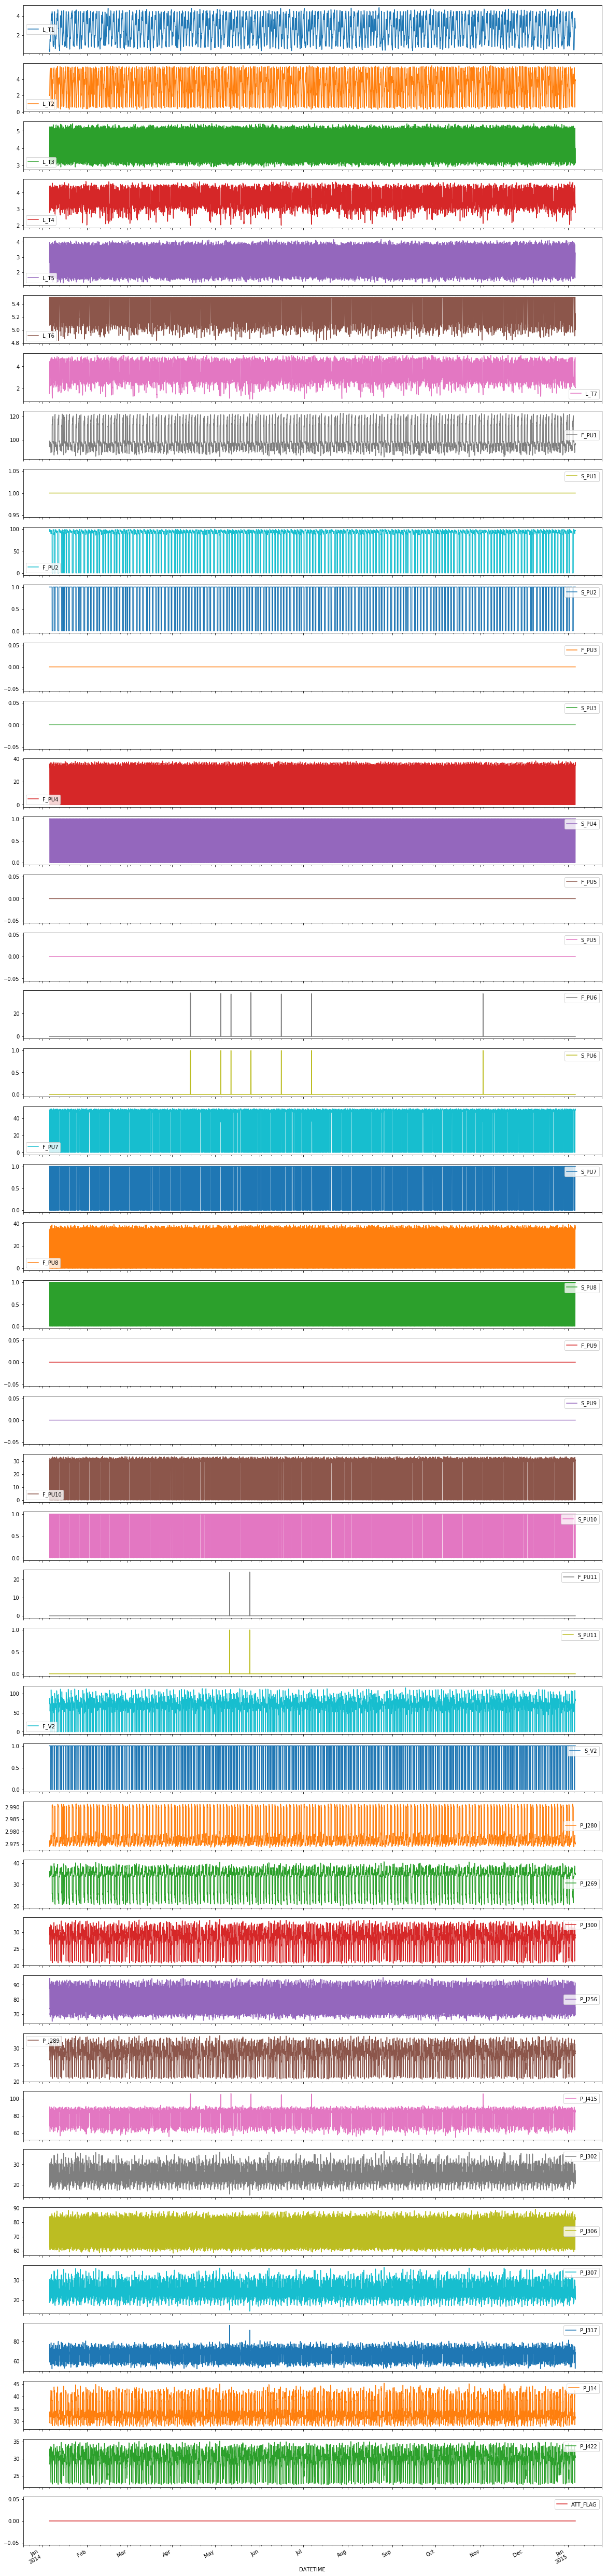

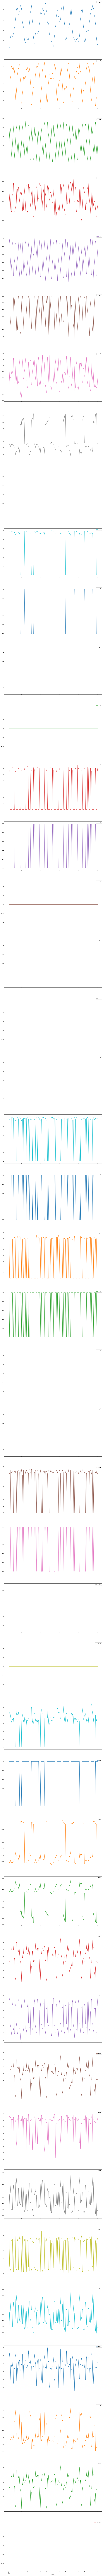

In [ ]:
data1.plot(subplots=True,figsize=(20, 100))
data2.plot(subplots=True,figsize=(20, 600))

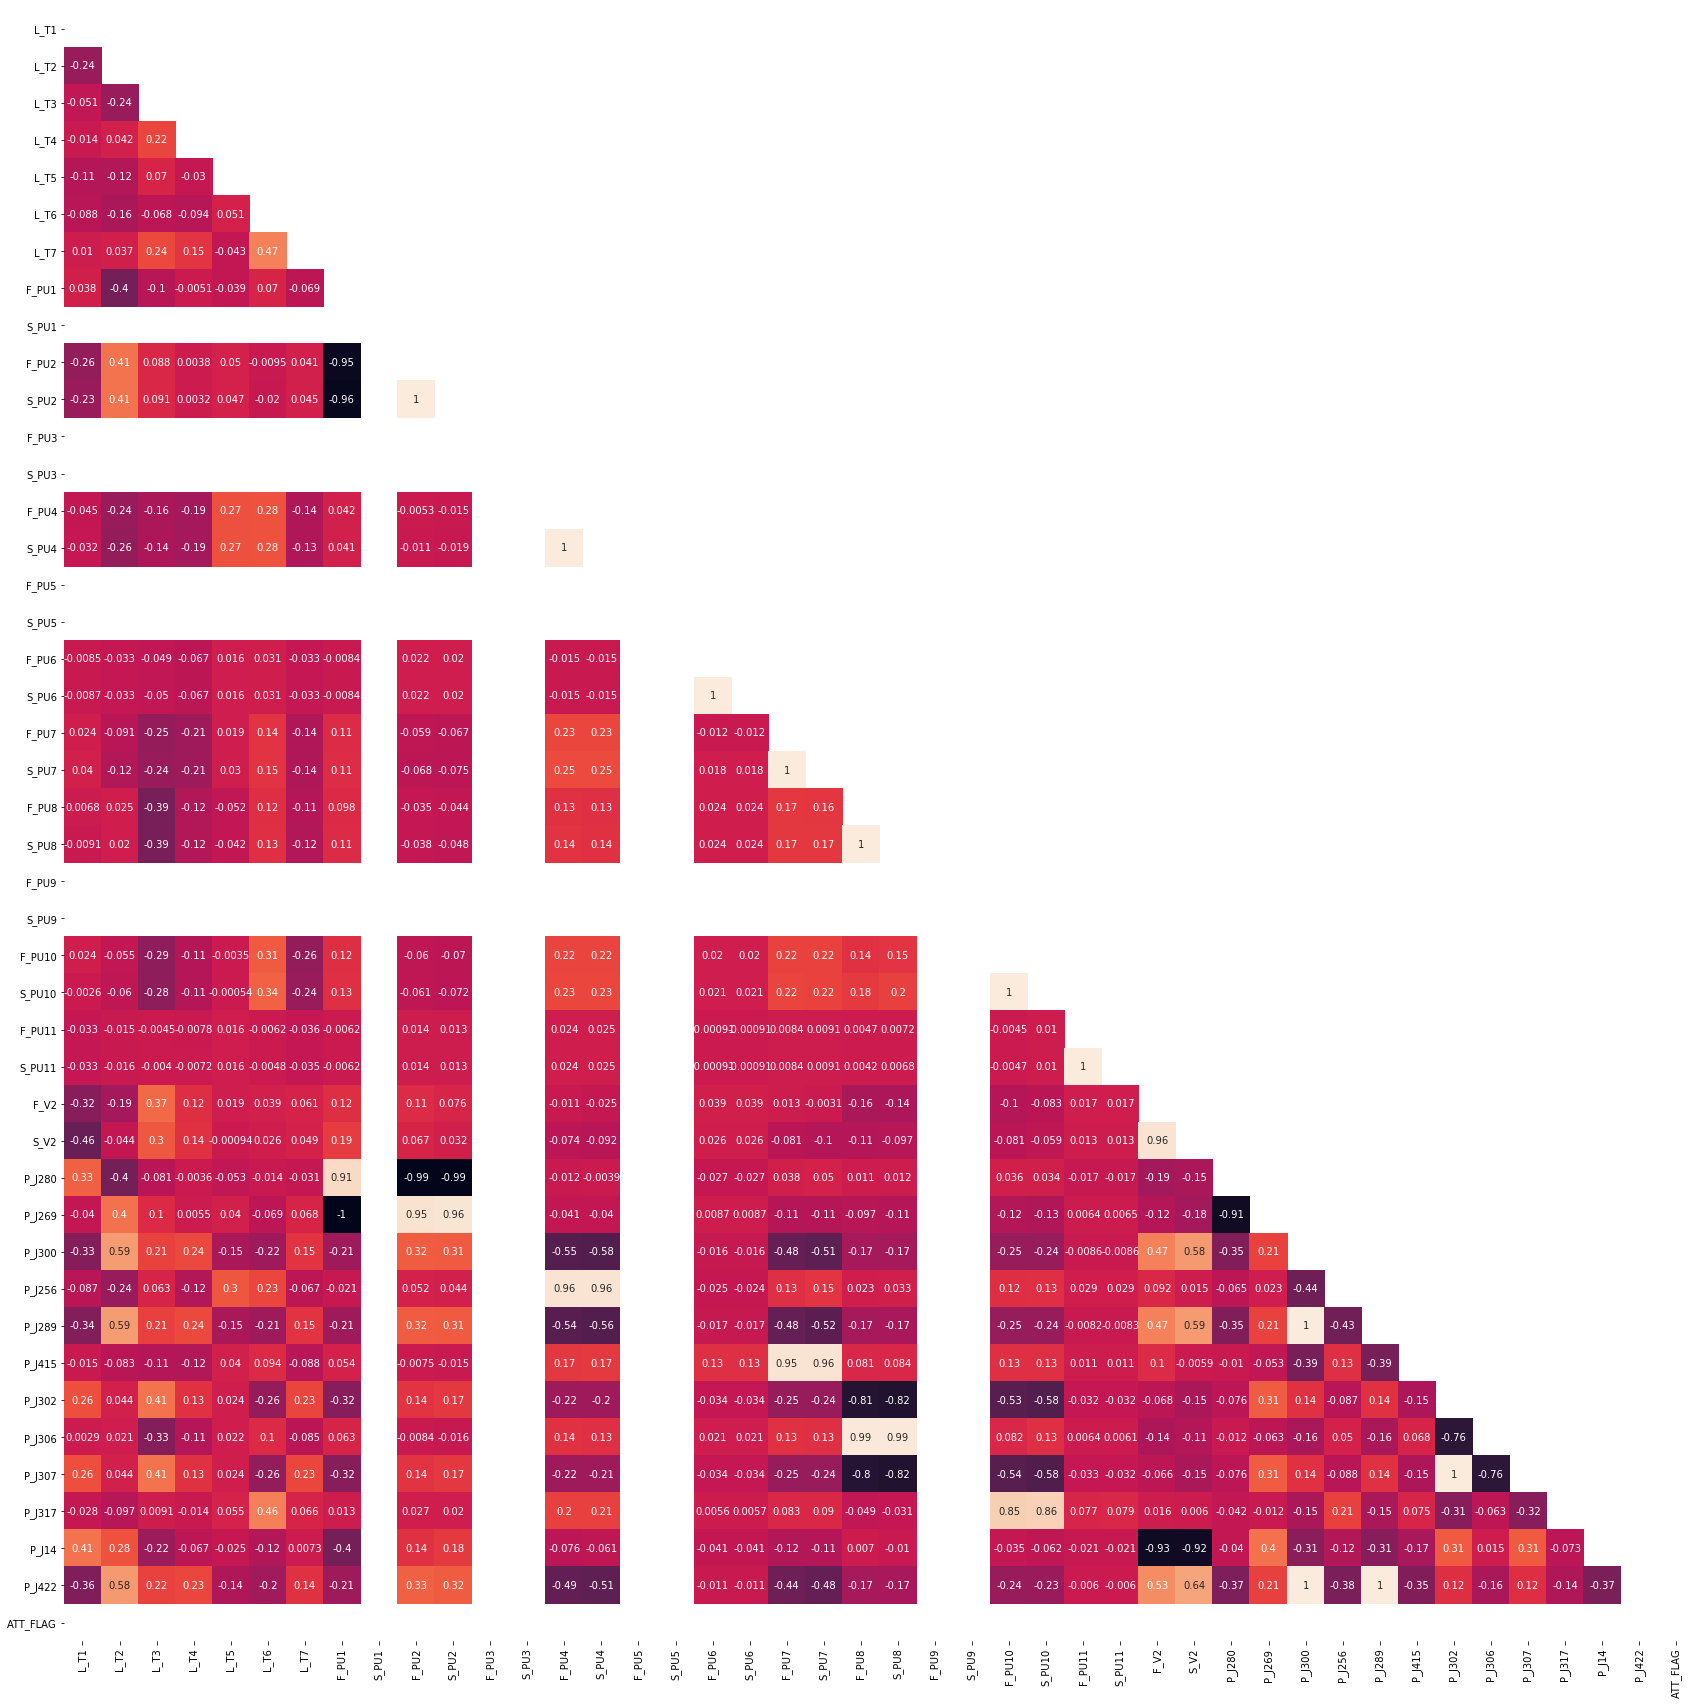

In [9]:
corr = data1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
fig.set_size_inches(30, 30)

sns.heatmap(corr, annot=True, mask=mask, square=True , ax=ax, cbar=False)

### Predicting next value in series

###### Persistance
Baseline, simply taks the previous $t-1$ value and predicts the next with it.

###### Linear regression
Create a model from 4 values and predict the subsequent 5th value.

In [4]:
def persistance(values):
    df = pd.concat([values.shift(1), values], axis=1)
    df.columns = ['t-1', 't+1']

    X = df.values
    train_size = int(len(X) * 0.8)
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    predictions = [x for x in test_X]
    test_score = mean_squared_error(test_y, predictions)
    
    return test_score

def regression(values, classifier='linreg'):
    def lin_reg(y):
        
        x = np.array(list(range(0, 4))).reshape(-1, 1)
        y = y[:-1]
        if classifier == 'linreg':
            clf = LinearRegression()
        elif classifier == 'regtree':
            clf = DecisionTreeRegressor()
        clf.fit(x, y)
        y_predicted = clf.predict(5)
        return mean_squared_error(x[-1], y_predicted)
    
    return values.rolling(5).apply(lin_reg).dropna().mean()[0]

print('COLUMN   MSE PERSISTANCE   MSE LINREG   MSE REGTREE')
for column in data1:
    if column not in ['DATETIME', 'ATT_FLAG']:
        values = pd.DataFrame(data1[column].values)
        mse_persistance = persistance(values)
        mse_lin_reg = regression(values, classifier='linreg')
        mse_reg_tree = regression(values, classifier='regtree')
        print('{}     {:.3f}           {:.3f}        {:.3f}'.format(column, mse_persistance, mse_lin_reg, mse_reg_tree))

COLUMN   MSE PERSISTANCE   MSE LINREG   MSE REGTREE
L_T1     0.055           2.075        1.550
L_T2     0.213           4.140        2.239
L_T3     0.143           3.064        1.905
L_T4     0.203           1.277        0.614
L_T5     0.242           2.309        0.604
L_T6     0.026           5.749        5.650


KeyboardInterrupt: 

## ARMA task – 1/2 A4 
Learn an autoregressive moving average model (see Wikipedia for an introduction if unfamiliar) 
for each individual sensor. Most statistical packages (R, statsmodels in Python) contain standard 
algorithm for fitting these models from training data. Use autocorrelation plots in order to 
identify the order of the ARMA models. The parameters can be determined using Akaike’s 
Information Criterion (AIC) or another model selection method. Note that there exists a wide 
range of ARMA variants; you only have to use the basic model.

Decide how to set the detection threshold sensibly. Study some of the anomalies detected 
anomalies. What kind of anomalies can you detect using ARMA models? Which sensors can be 
modeled effectively using ARMA?

#### Autocorrelation

High correlation: close to the regression line

Autocorrelation: How well does a $current-x$ value relate to the $current$ value. Plot with $current$ on one axis and incrementing $x$ on other axis.

Partial correlation: Is the error after fitting the regression line to the autocorrelation.

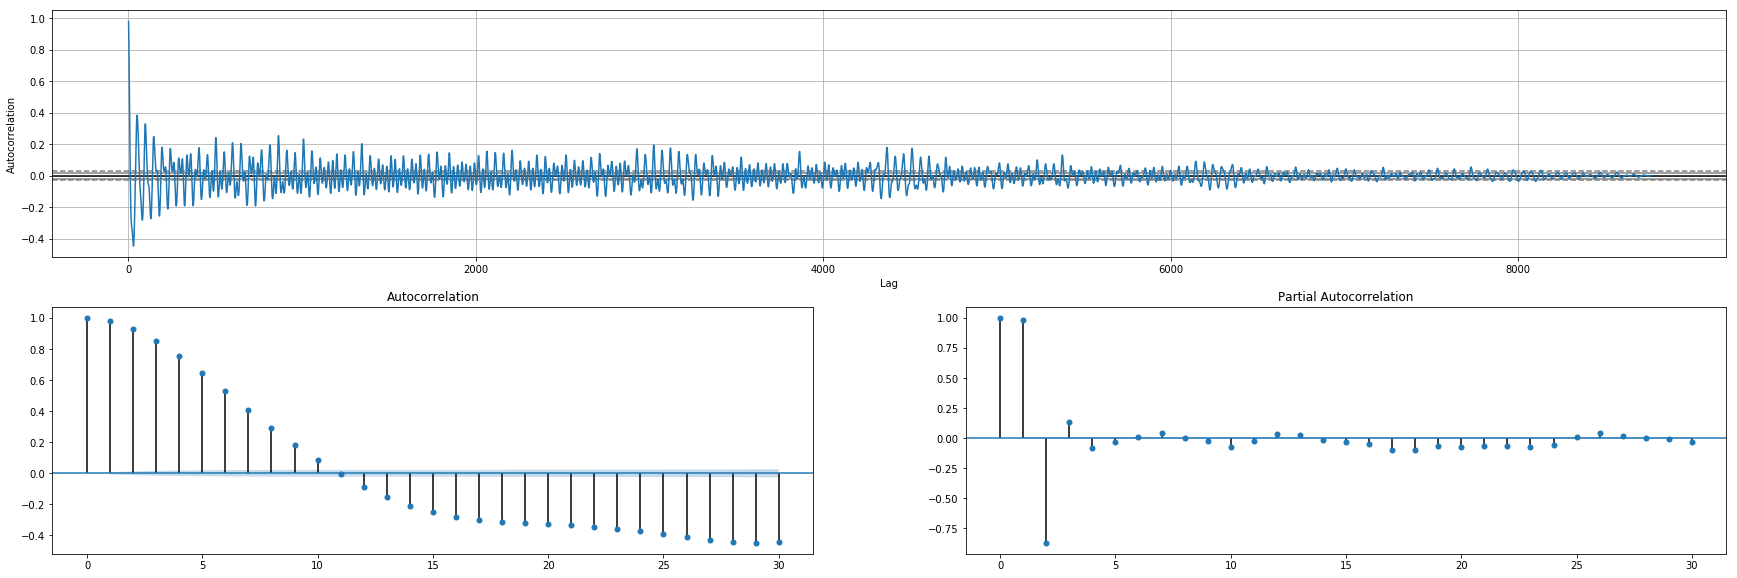

In [ ]:
for column in data1:
    if column not in ['DATETIME', 'ATT_FLAG', 'F_PU3', 'F_PU5', 'F_PU6', 'F_PU9', 'F_PU11', 'S_PU1','S_PU3','S_PU5', 'S_PU6','S_PU9', 'S_PU11']:
        fig = plt.figure(figsize=(30, 10))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        autocorrelation_plot(data1[column], ax=ts_ax)
        smt.graphics.plot_acf(data1[column], lags=30, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(data1[column], lags=30, ax=pacf_ax, alpha=0.5)
        break

#### ARMA

To estimate the ARMA order values we did a grid search on each sensors data, the best model is chosen based on the lowest value for Akaike’s Information Criterion (AIC).

In [ ]:
import warnings
warnings.filterwarnings("error")
pqdict= {}
for column in data1:
    if column not in ['DATETIME', 'ATT_FLAG', 'F_PU3', 'F_PU5', 'F_PU6', 'F_PU9', 'F_PU11', 'S_PU1','S_PU3','S_PU5', 'S_PU6','S_PU9', 'S_PU11']:
    
        r = 6
        lowest_aic = np.inf
        best_pq = (-1, -1)

        for p in range(r):
            for q in range(r):
                try:
                    order = (p, q)
                    try:
                        model = ARMA(data1[column], order=order).fit(method='mle')
                    except:
                        print('except')
                        continue
                    
                    print('({}, {}): {}'.format(p, q, model.aic))

                    if model.aic < lowest_aic:
                        lowest_aic = model.aic
                        best_pq = order

                except Exception as e:
                    print('({}, {}): {}'.format(p, q, str(e)))
        pqdict[column]= best_pq

        print('Best fit: {}, {}'.format(lowest_aic, best_pq))
        # residuals = pd.DataFrame(model_fit.resid)
        # print(residuals.describe())
        # residuals.plot()
        # residuals.plot(kind='kde')
        
print(pqdict)        

(0, 0): 28103.16014546976
Best fit: 28103.16014546976, (0, 0)
(0, 0): 31599.761002529143
Best fit: 31599.761002529143, (0, 0)
(0, 0): 18068.466955018775
Best fit: 18068.466955018775, (0, 0)
(0, 0): 14057.648972049032
Best fit: 14057.648972049032, (0, 0)
(0, 0): 19474.744426973826
Best fit: 19474.744426973826, (0, 0)
(0, 0): -5430.133113330516
Best fit: -5430.133113330516, (0, 0)
(0, 0): 21576.461470487662
Best fit: 21576.461470487662, (0, 0)
(0, 0): 65296.5194628814
Best fit: 65296.5194628814, (0, 0)
(0, 0): 90456.82186603404
Best fit: 90456.82186603404, (0, 0)
(0, 0): 10625.598155453537
Best fit: 10625.598155453537, (0, 0)
(0, 0): 74553.24827848263
Best fit: 74553.24827848263, (0, 0)
(0, 0): 12507.931329215673
Best fit: 12507.931329215673, (0, 0)
(0, 0): 75347.24231676977
Best fit: 75347.24231676977, (0, 0)
Best fit: inf, (-1, -1)
(0, 0): 74938.08649824941
Best fit: 74938.08649824941, (0, 0)
Best fit: inf, (-1, -1)
(0, 0): 68524.00877353296
Best fit: 68524.00877353296, (0, 0)
(0, 0): 

### Example predict

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))

                              ARMA Model Results                              
Dep. Variable:                   L_T1   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood                3829.361
Method:                           mle   S.D. of innovations              0.112
Date:                Wed, 30 May 2018   AIC                          -7634.722
Time:                        16:57:15   BIC                          -7556.515
Sample:                    01-06-2014   HQIC                         -7607.312
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6652      0.018    151.025      0.000       2.631       2.700
ar.L1.L_T1     3.7319      0.016    234.142      0.000       3.701       3.763
ar.L2.L_T1    -6.0778      0.019   -314.499      0.0

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T2   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood                 525.759
Method:                           mle   S.D. of innovations              0.218
Date:                Wed, 30 May 2018   AIC                          -1027.519
Time:                        16:57:27   BIC                           -949.312
Sample:                    01-06-2014   HQIC                         -1000.109
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2854      0.029    113.803      0.000       3.229       3.342
ar.L1.L_T2     2.9444        nan        nan        nan         nan         nan
ar.L2.L_T2    -2.8060        nan        nan        n

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T3   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood                2352.620
Method:                           mle   S.D. of innovations              0.151
Date:                Wed, 30 May 2018   AIC                          -4681.241
Time:                        16:57:34   BIC                          -4603.034
Sample:                    01-06-2014   HQIC                         -4653.831
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2012      0.001   4387.062      0.000       4.199       4.203
ar.L1.L_T3     1.3069      0.047     27.705      0.000       1.214       1.399
ar.L2.L_T3    -1.0918      0.080    -13.647      0.0

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T4   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood               -2312.806
Method:                           mle   S.D. of innovations              0.384
Date:                Wed, 30 May 2018   AIC                           4649.611
Time:                        16:57:45   BIC                           4727.817
Sample:                    01-06-2014   HQIC                          4677.021
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5689      0.012    297.931      0.000       3.545       3.592
ar.L1.L_T4     1.3106      0.114     11.463      0.000       1.087       1.535
ar.L2.L_T4    -0.7989      0.201     -3.984      0.0

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T5   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood                 236.951
Method:                           mle   S.D. of innovations              0.231
Date:                Wed, 30 May 2018   AIC                           -449.902
Time:                        16:57:57   BIC                           -371.696
Sample:                    01-06-2014   HQIC                          -422.492
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7471      0.003    897.124      0.000       2.741       2.753
ar.L1.L_T5     1.0801      0.120      9.037      0.000       0.846       1.314
ar.L2.L_T5    -0.2984      0.183     -1.626      0.1

C:\Users\Sophi\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T6   No. Observations:                 5000
Model:                     ARMA(5, 5)   Log Likelihood                3652.314
Method:                           mle   S.D. of innovations              0.117
Date:                Wed, 30 May 2018   AIC                          -7280.629
Time:                        16:58:04   BIC                          -7202.422
Sample:                    01-06-2014   HQIC                         -7253.218
                         - 08-02-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3687      0.001   3693.065      0.000       5.366       5.372
ar.L1.L_T6     2.4054      0.068     35.169      0.000       2.271       2.539
ar.L2.L_T6    -2.7409      0.112    -24.404      0.0

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

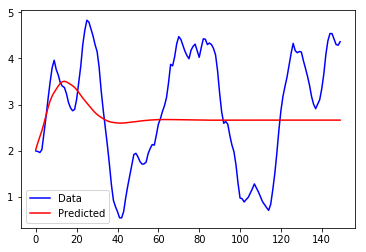

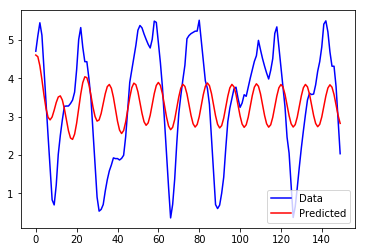

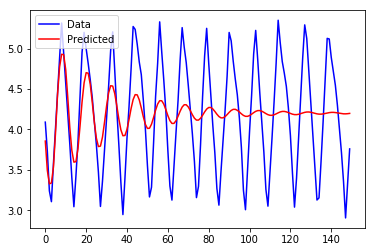

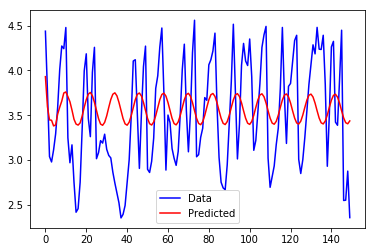

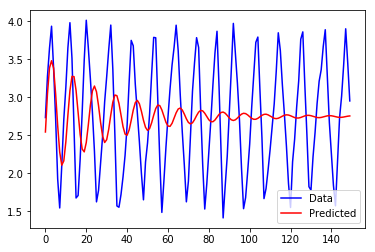

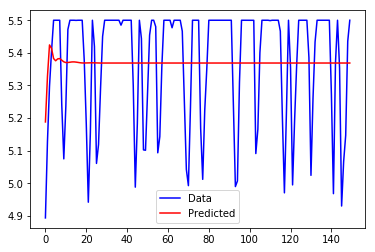

In [30]:
pqdict= {'L_T1': (5, 5), 'L_T2': (5, 5), 'L_T3': (5, 5), 'L_T4': (5, 5), 'L_T5': (5, 5), 'L_T6': (5, 5), 'L_T7': (5, 5), 'F_PU1': (5, 5), 'F_PU2': (5, 5), 'S_PU2': (5, 5), 'F_PU4': (5, 5), 'S_PU4': (5, 5), 'F_PU7': (5, 5), 'S_PU7': (5, 5), 'F_PU8': (5, 5), 'S_PU8': (5, 5), 'F_PU10': (5, 5), 'S_PU10': (5, 5), 'F_V2': (5, 5), 'S_V2': (5, 5), 'P_J280': (5, 5), 'P_J269': (5, 5), 'P_J300': (5, 5), 'P_J256': (5, 5), 'P_J289': (5, 5), 'P_J415': (5, 5), 'P_J302': (5, 5), 'P_J306': (5, 5), 'P_J307': (5, 5), 'P_J317': (5, 5), 'P_J14': (5, 5), 'P_J422': (5, 5)}

for column in data1:
    if column not in ['DATETIME', 'ATT_FLAG', 'F_PU3', 'F_PU5', 'F_PU6', 'F_PU9', 'F_PU11', 'S_PU1','S_PU3','S_PU5', 'S_PU6','S_PU9', 'S_PU11']:

        train = data1[column][:5000]
        test = data1[column][5000:5150]

        model = ARMA(train, order=pqdict[column]).fit(method='mle')
        print(model.summary())

        x = (5000, 5150)
        predict = model.predict(*x)

        y = []
        y_hat = []
        for y_predicted, y_test in zip(predict, test):
            y.append(y_test)
            y_hat.append(y_predicted)

        MSElist= [] 

        MSElist= mean_squared_error(y, y_hat) 

        print(MSElist)     


        fig, ax = plt.subplots()
        ax.plot(y, color='b', label='Data')
        ax.plot(y_hat, color='r', label='Predicted')
        # ax.title('Fit {}'.format(str(best_pq)))
        ax.legend(loc='best')

        # Get error between curves?

## Discrete models task - 1/2 A4
Discretize the sensor data using any of the methods discussed in class. Explain why you choose 
this method and why the obtained discretization makes sense. Visualize the discretization.
Apply any of the sequential data mining methods (N-grams, Sequence alignment with kNN, ...) to 
sliding windows with a length of your choosing in order to find anomalies. Whenever an 
observed N-gram’s probability is too small, or the sequential data is too distant from any training 
sequence, raise an alarm. Set your thresholds sensibly. 

What kind of anomalies can you detect using the sequential model? Which sensors can be modeled effectively?

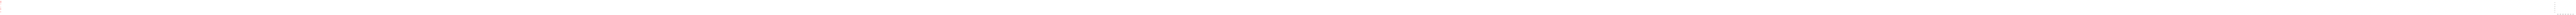

In [20]:
# 2. Visualize discretization (Seperate from rest)

from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string

def visualize_discretize(data_list, letters=5):
    
    # Chunks of size 3
    chunks = int(len(data_list) / 3)

    d_znorm = znorm(data_list)
    d_paa = paa(d_znorm, chunks)
    categories = ts_to_string(d_paa, cuts_for_asize(letters))

    split_size = len(d_znorm) / len(d_paa)
    offset = 0
    next_offset = split_size
    for p, cat in zip(d_paa, categories):
        xmin = offset / len(d_znorm)
        xmax = next_offset / len(d_znorm)
        plt.axhline(y=p, xmin=xmin, xmax=xmax, color='r')
        plt.text(offset, p + 0.1, cat, color='r', fontsize=14)
        offset += split_size
        next_offset += split_size

    plt.plot(d_znorm)

visualize_discretize(data1['L_T1'][:50])

#### Ngram

In [164]:
# 3. Apply sequential data mining methods (N-grams, Sequence alignment with kNN, ...) to 
#    sliding windows with a length of your choosing in order to find anomalies

# compute the probability of observing a sequence


from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string

from itertools import permutations
from itertools import islice
from collections import Counter

def znorm_custom(series, znorm_threshold=0.01):
    """
    Custom implementation of SAX znorm, because we need it to return the mean and sd from the training set
    
    https://github.com/seninp/saxpy/blob/master/saxpy/znorm.py
    """
    sd = np.std(series)
    if (sd < znorm_threshold):
        return series
    mean = np.mean(series)
    return ((series - mean) / sd), mean, sd


def window(seq, n=2):
    """
    Returns a sliding window (of width n) over data from the iterable
     s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...   
    
    https://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator
    """            
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

        
def create_ngrams_probs(data_list, ngram_size=3):
    chunks = int(len(data_list) / 3)
    letters = 5
    ngram_size=3

    d_znorm, mean, sd = znorm_custom(data_list)
    #d_paa = paa(d_znorm, chunks)  # problem with test data, align chunks, needs at leas x data to create chunk
    categories = ts_to_string(d_znorm, cuts_for_asize(letters))
        
    ngrams = list(window(categories, n=ngram_size))
    ngram_count = Counter(ngrams)
    ngram_count_minus_1 = Counter([x[:-1] for x in ngrams])
    
    print(ngram_count)
    print(ngram_count_minus_1)
    
    probs = {}
    for gram, count in ngram_count.items():
        probs[gram] = count / ngram_count_minus_1[gram[:-1]]
    
    return probs, mean, sd
    
train_probs, train_mean, train_sd = create_ngrams_probs(data1['L_T1'][:50])
print(train_probs)

Counter({('e', 'e', 'e'): 11, ('a', 'a', 'a'): 10, ('b', 'b', 'b'): 5, ('d', 'd', 'd'): 5, ('a', 'a', 'b'): 2, ('a', 'b', 'b'): 2, ('d', 'd', 'e'): 2, ('d', 'e', 'e'): 2, ('b', 'b', 'a'): 1, ('b', 'a', 'a'): 1, ('b', 'b', 'c'): 1, ('b', 'c', 'c'): 1, ('c', 'c', 'c'): 1, ('c', 'c', 'd'): 1, ('c', 'd', 'd'): 1, ('e', 'e', 'd'): 1, ('e', 'd', 'd'): 1})
Counter({('a', 'a'): 12, ('e', 'e'): 12, ('b', 'b'): 7, ('d', 'd'): 7, ('a', 'b'): 2, ('c', 'c'): 2, ('d', 'e'): 2, ('b', 'a'): 1, ('b', 'c'): 1, ('c', 'd'): 1, ('e', 'd'): 1})
{('a', 'a', 'a'): 0.8333333333333334, ('a', 'a', 'b'): 0.16666666666666666, ('a', 'b', 'b'): 1.0, ('b', 'b', 'b'): 0.7142857142857143, ('b', 'b', 'a'): 0.14285714285714285, ('b', 'a', 'a'): 1.0, ('b', 'b', 'c'): 0.14285714285714285, ('b', 'c', 'c'): 1.0, ('c', 'c', 'c'): 0.5, ('c', 'c', 'd'): 0.5, ('c', 'd', 'd'): 1.0, ('d', 'd', 'd'): 0.7142857142857143, ('d', 'd', 'e'): 0.2857142857142857, ('d', 'e', 'e'): 1.0, ('e', 'e', 'e'): 0.9166666666666666, ('e', 'e', 'd'): 

#### Raise alarm

In [165]:
# 4. Rais alarm whenever an observed N-gram’s probability is too small, or the sequential data is 
#    too distant from any training sequence, raise an alarm. Set your thresholds sensibly. 

# Use discretization distribution from training set, for now
# Use a rolling window on the test set, to compute probabilities, so probabilities are 1 for the first few n-grams in the total dataset.
# Threshold is set by the training data. (minus some constant error?)

from collections import defaultdict

def test_data(test_data_list, train_probs_threshold, train_mean, train_sd, rolling_window_size=20):
    
    # Get n-gram size from training data
    ngram_size = len(next(iter(train_probs_threshold)))
    
    d_znorm = (test_data_list - train_mean) / train_sd
    categories = ts_to_string(d_znorm, cuts_for_asize(letters))

    ngram_list = []
    ngram_list_minus_1 = []
    for w in window(categories, n=ngram_size):
        
        ngram_list.append(w)
        ngram_list_minus_1.append(w[:-1])
        
        if len(ngram_list) > rolling_window_size:
            # Once rolling window reached its max size, forget the oldest value
            del ngram_list[0]
            del ngram_list_minus_1[0]

        # Create ngram counts
        ngram_count = Counter(ngram_list)
        ngram_count_minus_1 = Counter(ngram_list_minus_1)

        prob = ngram_count[w] / ngram_count_minus_1[w[:-1]]
        
        # TODO raise alarm when higher than trained threshold and max rolling window size has been reached
        print('{}: {}'.format(w, prob))

test_data(data1['L_T1'][:50], train_probs, train_mean, train_sd, rolling_window_size=20)

('a', 'a', 'a'): 1.0
('a', 'a', 'a'): 1.0
('a', 'a', 'a'): 1.0
('a', 'a', 'a'): 1.0
('a', 'a', 'a'): 1.0
('a', 'a', 'a'): 1.0
('a', 'a', 'b'): 0.14285714285714285
('a', 'b', 'b'): 1.0
('b', 'b', 'b'): 1.0
('b', 'b', 'a'): 0.5
('b', 'a', 'a'): 1.0
('a', 'a', 'a'): 0.875
('a', 'a', 'a'): 0.8888888888888888
('a', 'a', 'a'): 0.9
('a', 'a', 'a'): 0.9090909090909091
('a', 'a', 'b'): 0.16666666666666666
('a', 'b', 'b'): 1.0
('b', 'b', 'b'): 0.6666666666666666
('b', 'b', 'b'): 0.75
('b', 'b', 'b'): 0.8
('b', 'b', 'b'): 0.8333333333333334
('b', 'b', 'c'): 0.14285714285714285
('b', 'c', 'c'): 1.0
('c', 'c', 'c'): 1.0
('c', 'c', 'd'): 0.5
('c', 'd', 'd'): 1.0
('d', 'd', 'd'): 1.0
('d', 'd', 'e'): 0.5
('d', 'e', 'e'): 1.0
('e', 'e', 'e'): 1.0
('e', 'e', 'e'): 1.0
('e', 'e', 'e'): 1.0
('e', 'e', 'e'): 1.0
('e', 'e', 'd'): 0.2
('e', 'd', 'd'): 1.0
('d', 'd', 'd'): 0.6666666666666666
('d', 'd', 'd'): 0.75
('d', 'd', 'd'): 0.8
('d', 'd', 'd'): 0.8333333333333334
('d', 'd', 'e'): 0.2857142857142857
('d

## PCA task – 1/2 A4 
Perform PCA-based anomaly detection on the signal data. Set the threshold on training data to a 
value that results in few false positives on the training data. Plot the PCA residuals in one signal. 
Do you see large abnormalities in the training data? Can you explain why these occur? It is best to
remove such abnormalities from the training data since you only want to model normal behavior. 
What kind of anomalies can you detect using PCA?

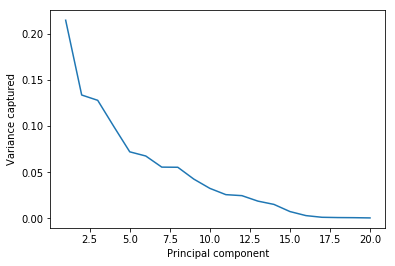

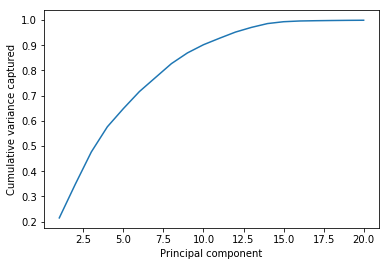

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



(8761,)
(8761, 44)
Traceback (most recent call last):
  File "C:\Users\Sophi\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3063, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 140, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 162, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1492, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1500, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'ATT_FLAG'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Sophi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-4f6ad6fb04c7>", line 62, in <module>
    labels= testdata_pca['ATT_FLAG']
  File "C:\Users\So

TypeError: must be str, not list

In [83]:
#scaling part and the creation of a PCA model # on training dataset 1
data1_pca = data1.copy()
data1_pca.drop('ATT_FLAG', axis=1)

scaler = StandardScaler()
normalized_training = scaler.fit_transform(data1_pca)
#print(normalized_training) 

# moet dit alleen op trainingset 1 of ook o trainingset 2
#https://github.com/alexberndt/CyberDataAnalytics/blob/master/lab2/PCA.py
#waarom 11 en 9???we can use 11 components for modeling, and 9 for anomalous subspace waarom dit???
pca = decomposition.PCA(n_components=20)  # set Principial components n=20 k=   The remaining (n−k) principal components constitute the abnormal subspace

#print(pca) 
pca.fit(normalized_training)
pca_model = pca.transform(normalized_training)
#print(pca_model) 

    #variance, ratio of variance and cumulative variance ratio
    
#print(np.sort(pca.explained_variance_)[::-1])
#print(np.sort(pca.explained_variance_ratio_)[::-1])
pca.explained_variance_ratio_.cumsum()

    #plot the variance, cumulative variance , and plotting one column
    
x_axis = np.arange(1, (len(pca.explained_variance_ratio_) + 1), 1)
plt.xlabel('Principal component')
plt.ylabel('Variance captured')
plt.plot(x_axis, pca.explained_variance_ratio_)
plt.show() #Graph: Fractional of total variance captured by each principal component.

    #cumulative variance 
    
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance captured')
plt.plot(x_axis, pca.explained_variance_ratio_.cumsum())
plt.show()

    #one column
#print(pca_model[:,0])
print(pca_model[:,0].shape)
print(data1_pca.shape) 
data1_pca['PC1'] = pca_model[:,0]


#data1_pca['PC1'].plot(figsize=(15,5))

#x_as = np.arange(1, (len(pca.explained_variance_ratio_) + 1), 1)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.plot(data1_pca['PC1'],testdata_pca['PC2'])
# plt.show()




#detection of anomalies using PCA on tested data, and matrix Q representing principal components related to the normal subspace

#label= testdata['ATT_FLAG']
testdata_pca = testdata.copy()
labels= testdata_pca['ATT_FLAG'] 
testdata_pca.drop('ATT_FLAG', axis=1)

normalized_test= scaler.fit_transform(testdata_pca)
pca_model_test= pca.transform(normalized_test)

    #one column test data
testdata_pca['PC2'] = pca_model_test[:,0] 
#testdata_pca = testdata_pca.assign(PC2=pca_model_test[:,0]) 
#testdata_pca['PC2'].plot(figsize=(15,5))

#x_as = np.arange(1, (len(pca.explained_variance_ratio_) + 1), 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.plot(np.arrange(data1_pca['PC1']), np.arrange(testdata_pca['PC2'])) 
plt.show()





eigenvectors = pca.components_
Q= np.transpose(eigenvectors[:-9]) #waarom 9? denk dat die 9 naar anomalous subspace verwijst, weet alleen niet waarom die 9 was. 
Q_T=np.transpose(Q) 
C=np.dot(Q,Q_T) 
    
    #matrix dimensions 43- ATTFLAG - DATETIME gives a matrix of 41x41

iden=np.identity(41) 

    #the protection of testdata y_residual on the anomalous subspace and calcuating the projection of it
    
y_residual=np.zeros((normalized_test.shape)) 
for j in range(normalized_test.shape[0]): #converting row to a column vector
    y=np.transpose(normalized_test[j])
    y_residual[j]=np.dot(iden -C,y) 
    
   #The square prediction error of each y_residual and if the square error prediction is bigger than the threshold then setting to 1

spe=np.zeros((normalized_test.shape[0]))
on=np.zeros((normalized_test.shape[0]))
threshold= 500 #why 500??????

for j in range(normalized_test.shape[0]):
    spe[j]= np.square(np.sum(np.subtract(y_residual[j], normalized_test[j]))) 
    if(spe[j] > threshold):
        on[j]=1
        
        
testdata=testdata.assign(ResidualVector=spe)
testdata['Residualvector'].plot(figsize=(15,5))
plt.show()

        
tp = 0
fp = 0
tn = 0
fn = 0
for j in range(normalized_test.shape[0]):
    if(labels[j] == 1 and on[j] == 1):
        tp = tp + 1
    if(labels[j] == 0 and on[j] == 1):
        fp = fp + 1
    if(labels[j] == 0 and on[j] == 0):
        fn = fn + 1    
    if(labels[j] == 1 and on[j] == 0):
        tn = tn + 1
        
print("FP: {} ".format(fp)) 
print("FN: {} ".format(fn))         
print("TP: {} ".format(tp)) 
print("TN: {} ".format(tn))








    
    
    
    
    
    


## Comparison task – 1 A4 
Compare the performance of the PCA method with the ARMA and discrete models. 
Comparing 
anomaly detection methods in not straightforward, and different research studies frequently use 
different measures. You can either:
•
test point-wise precision and recall, or 
•
overlap-based false and true positives, or /and 
•
count a true positive if it detects at least one anomaly in an anomalous region, or 
•
compare the top-k detected anomalies, 
•
or... 
Describe in a few lines which comparison method you chose for this data and why. Keep in mind that 
in practice an analyst has to take action on every positive detected, but will not study every detected 
data point. Do you recommend using PCA, ARMA, or discrete model

## Bonus task – 1 A4 
Think of a way (study the papers) to combine the predictions of all the individual models into a 
single anomaly detection method. Implement it and evaluate its effectiveness compared to each 
of the methods individually.

In [65]:
dat = np.array([0., 0., 0., 0., 0., -0.270340178359072, -0.367828308500142,
                0.666980581124872, 1.87088147328446, 2.14548907684624,
                -0.480859313143032, -0.72911654245842, -0.490308602315934,
                -0.66152028906509, -0.221049033806403, 0.367003418871239,
                0.631073992586373, 0.0487728723414486, 0.762655178750436,
                0.78574757843331, 0.338239686422963, 0.784206454089066,
                -2.14265084073625, 2.11325193044223, 0.186018356196443,
                0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.519132472499234,
                -2.604783141655, -0.244519550114012, -1.6570790528784,
                3.34184602886343, 2.10361226260999, 1.9796808733979,
                -0.822247322003058, 1.06850578033292, -0.678811824405992,
                0.804225748913681, 0.57363964388698, 0.437113583759113,
                0.437208643628268, 0.989892093383503, 1.76545983424176,
                0.119483882364649, -0.222311941138971, -0.74669456611669,
                -0.0663660879732063, 0., 0., 0., 0., 0.,])

from saxpy.znorm import znorm
from saxpy.paa import paa
from saxpy.sax import ts_to_string
p = paa([-2, 0, 2, 0, -1], 3)
print(ts_to_string(p, cuts_for_asize(3)))


aca
